<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/06_Lab_5_Binary_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary images** 

Use the binary   cut-out   image   generated and   see   how   to   extract connected components and how different morphological operations canbe applied to it . 

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [7]:
# Download the images using wget (Linux)
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/Girl_in_front_of_a_green_background.jpg

--2020-03-09 20:29:23--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/Girl_in_front_of_a_green_background.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258747 (253K) [image/jpeg]
Saving to: ‘Girl_in_front_of_a_green_background.jpg’

Girl_in_front_of_a_ 100%[===================>] 252.68K  --.-KB/s    in 0.05s   

2020-03-09 20:29:24 (4.94 MB/s) - ‘Girl_in_front_of_a_green_background.jpg’ saved [258747/258747]



In [0]:
def area_and_perimeter(binary):
    A=0
    P=0
    for x in range(binary.shape[0]-1):
        for y in range(binary.shape[1]-1):
            if binary[x,y]==0 and binary[x+1,y]==0 and binary[x,y+1]==0 and binary[x+1,y+1]==0:
                A+=0
                P+=0
            elif binary[x,y]>0 and binary[x+1,y]>0 and binary[x,y+1]>0 and binary[x+1,y+1]>0:
                A+=1
                P+=0
            elif binary[x,y]>0 and binary[x+1,y]==0 and binary[x,y+1]==0 and binary[x+1,y+1]>0:
                A+=0.5
                P+=1
            elif binary[x,y]==0 and binary[x+1,y]>0 and binary[x,y+1]>0 and binary[x+1,y+1]==0:
                A+=0.5
                P+=1
            elif binary[x,y]>0 and binary[x+1,y]==0 and binary[x,y+1]==0 and binary[x+1,y+1]==0:
                A+=0.25
                P+=0.5
            elif binary[x,y]==0 and binary[x+1,y]>0 and binary[x,y+1]==0 and binary[x+1,y+1]==0:
                A+=0.25
                P+=0.5
            elif binary[x,y]==0 and binary[x+1,y]==0 and binary[x,y+1]>0 and binary[x+1,y+1]==0:
                A+=0.25
                P+=0.5
            elif binary[x,y]==0 and binary[x+1,y]==0 and binary[x,y+1]==0 and binary[x+1,y+1]>0:
                A+=0.25
                P+=0.5
            elif binary[x,y]>0 and binary[x+1,y]>0 and binary[x,y+1]==0 and binary[x+1,y+1]==0:
                A+=0.5
                P+=0.5
            elif binary[x,y]==0 and binary[x+1,y]>0 and binary[x,y+1]==0 and binary[x+1,y+1]>0:
                A+=0.5
                P+=0.5
            elif binary[x,y]==0 and binary[x+1,y]==0 and binary[x,y+1]>0 and binary[x+1,y+1]>0:
                A+=0.5
                P+=0.5
            elif binary[x,y]>0 and binary[x+1,y]==0 and binary[x,y+1]>0 and binary[x+1,y+1]==0:
                A+=0.5
                P+=0.5
            elif binary[x,y]>0 and binary[x+1,y]>0 and binary[x,y+1]>0 and binary[x+1,y+1]==0:
                A+=0.75
                P+=0.5
            elif binary[x,y]>0 and binary[x+1,y]>0 and binary[x,y+1]==0 and binary[x+1,y+1]>0:
                A+=0.75
                P+=0.5
            elif binary[x,y]==0 and binary[x+1,y]>0 and binary[x,y+1]>0 and binary[x+1,y+1]>0:
                A+=0.75
                P+=0.5
            elif binary[x,y]>0 and binary[x+1,y]==0 and binary[x,y+1]>0 and binary[x+1,y+1]>0:
                A+=0.75
                P+=0.5
            else:
                print("!!!")    
    return A,P

In [0]:
def connected_components(binary):
    count,labels = cv2.connectedComponents(binary)
    area = np.zeros(count)
    for i in range(count):
        area[i] = np.sum(labels==i)
    largest = np.argmax(area)
    # cv2.imshow("largest connected component",255*np.array(labels==largest, dtype=np.uint8))
    print("Largest connected component")
    cv2_imshow(255*np.array(labels==largest, dtype=np.uint8))
    area[largest]=-1
    largest = np.argmax(area)
    # cv2.imshow("second largest connected component",255*np.array(labels==largest, dtype=np.uint8))
    print("Second largest connected component")
    cv2_imshow(255*np.array(labels==largest, dtype=np.uint8))
    area[largest]=-1
    largest = np.argmax(area)
    # cv2.imshow("third largest connected component",255*np.array(labels==largest, dtype=np.uint8))
    print("Third largest connected component")
    cv2_imshow(255*np.array(labels==largest, dtype=np.uint8))
    return

In [0]:
def morphology(binary, i):    
    iterations = i
    size = 3
    
    structuring_element = np.ones((size,size),np.uint8)
    erosion = cv2.erode(binary,structuring_element, iterations = iterations)    
    #cv2.imshow("erosion", erosion)
    print('Erosion')
    cv2_imshow(erosion)
    
    dilation = cv2.dilate(binary,structuring_element, iterations = iterations)    
    #cv2.imshow("dilation", dilation)
    print('Dilation')
    cv2_imshow(dilation)

    opening = cv2.morphologyEx(binary,
                               cv2.MORPH_OPEN, 
                               structuring_element, 
                               iterations = iterations)    
    #cv2.imshow("opening", opening)
    print('Opening')
    cv2_imshow(opening)

    closing = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, structuring_element, iterations = iterations)    
    # cv2.imshow("closing", closing)
    print('Closing')
    cv2_imshow(closing)
    return

Largest connected component


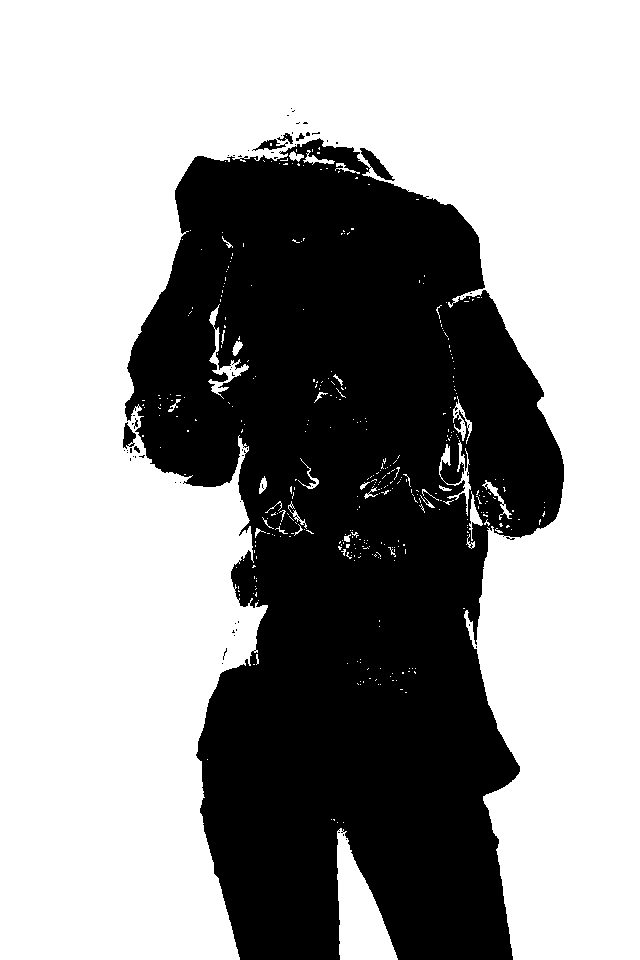

Second largest connected component


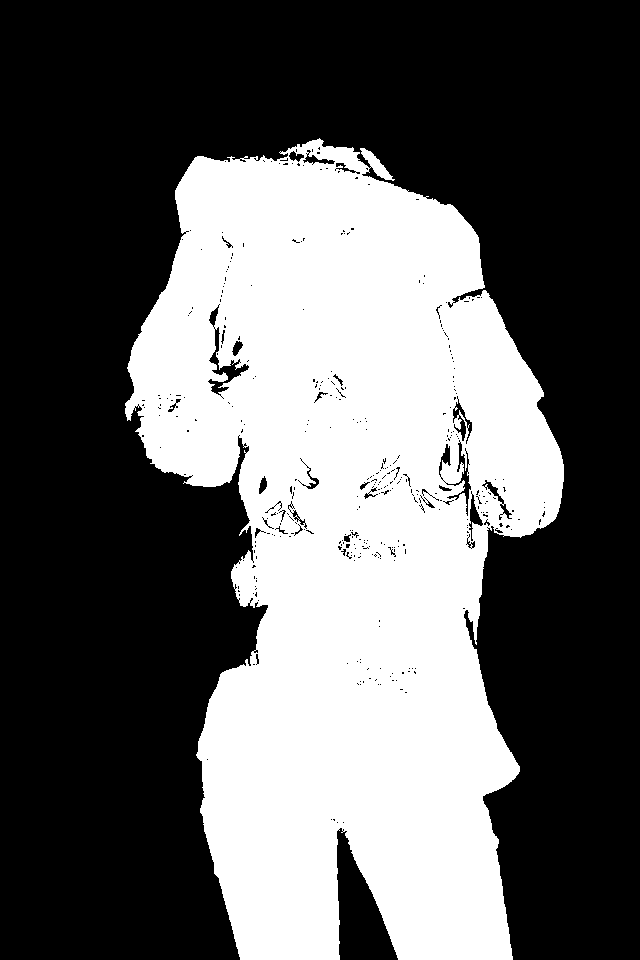

Third largest connected component


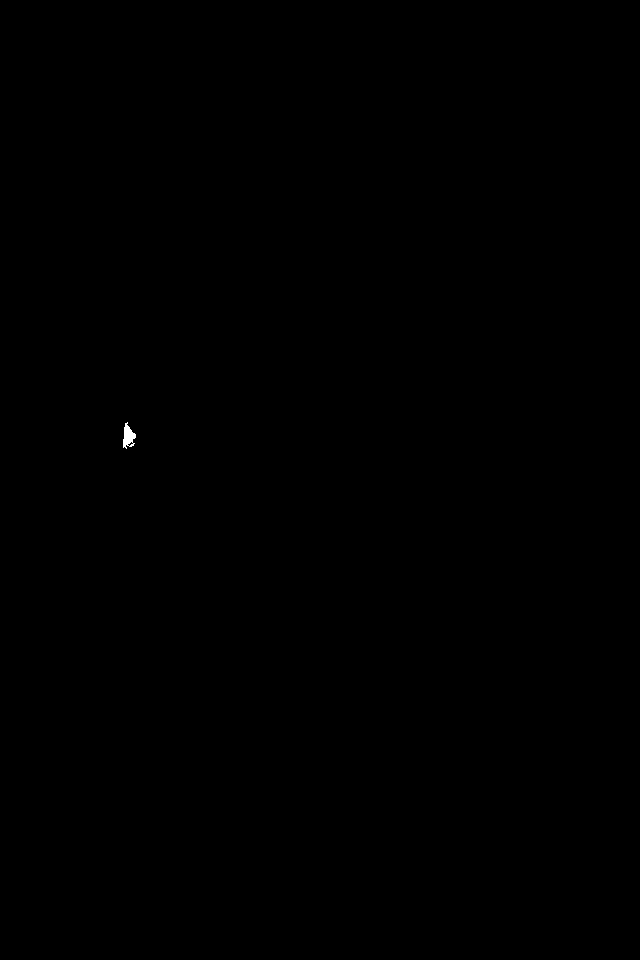

Form factor =  11.051092967144884
Iteration = 1
Erosion


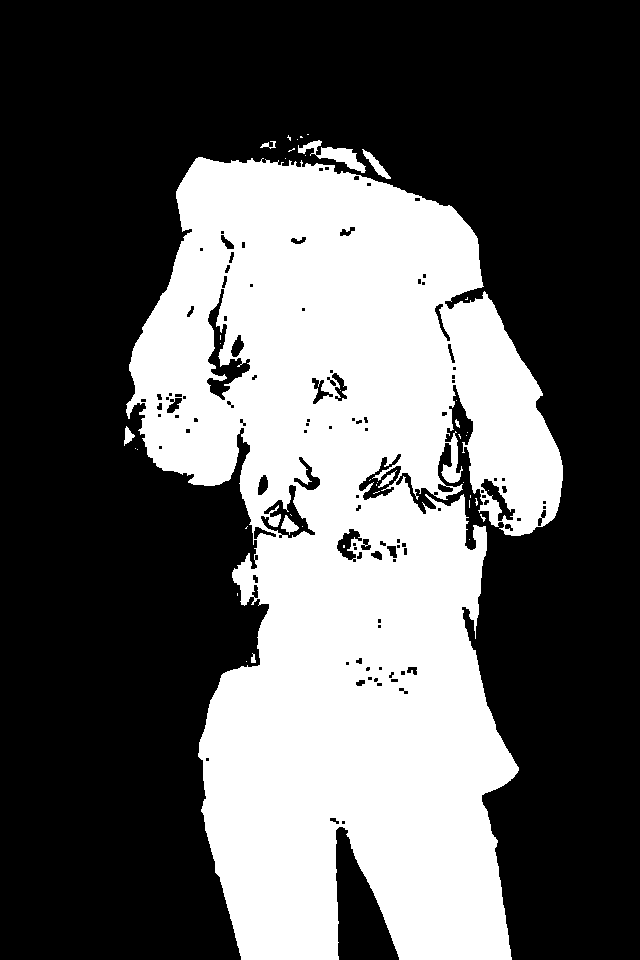

Dilation


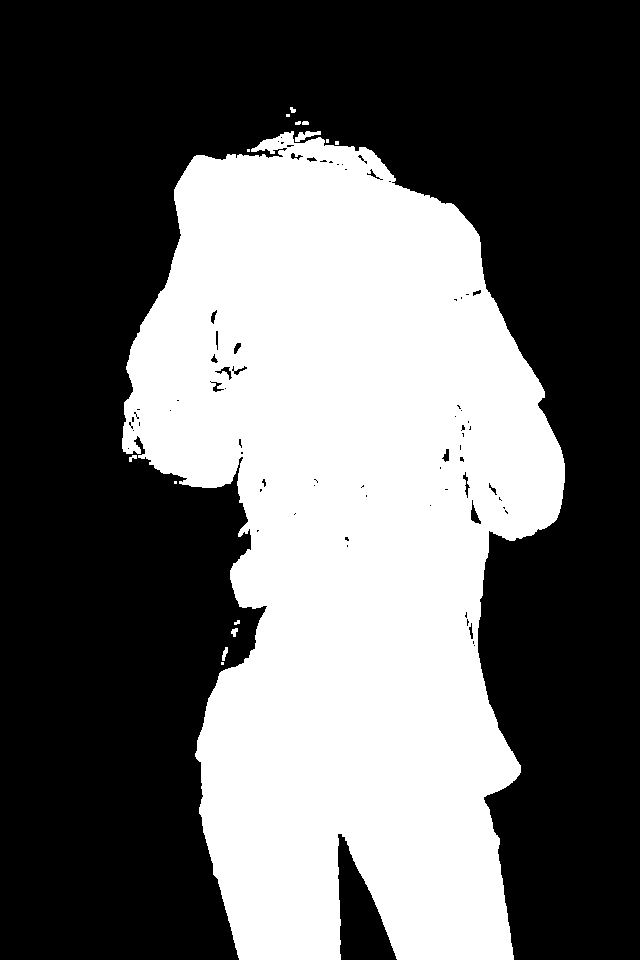

Opening


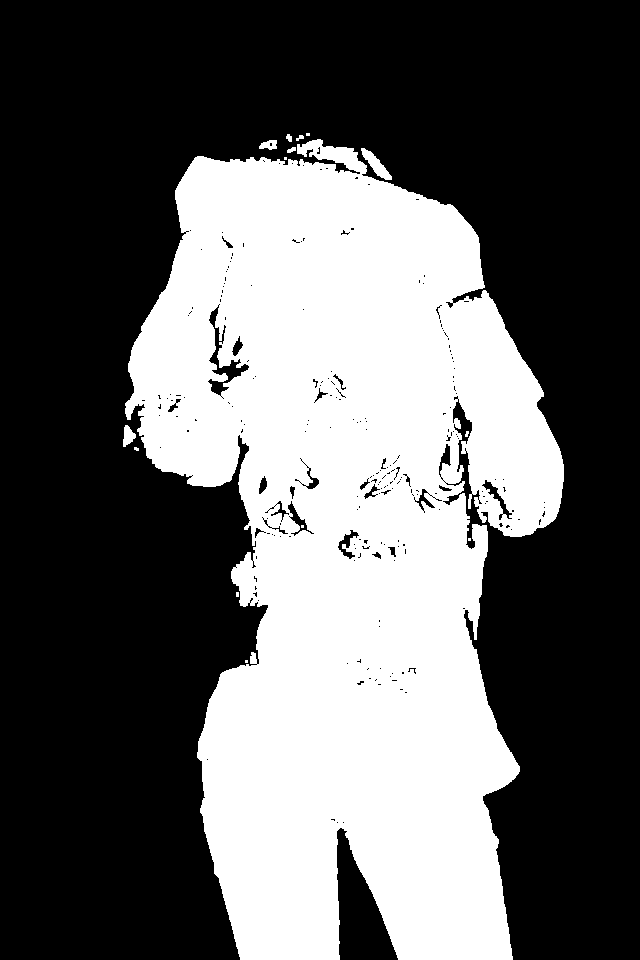

Closing


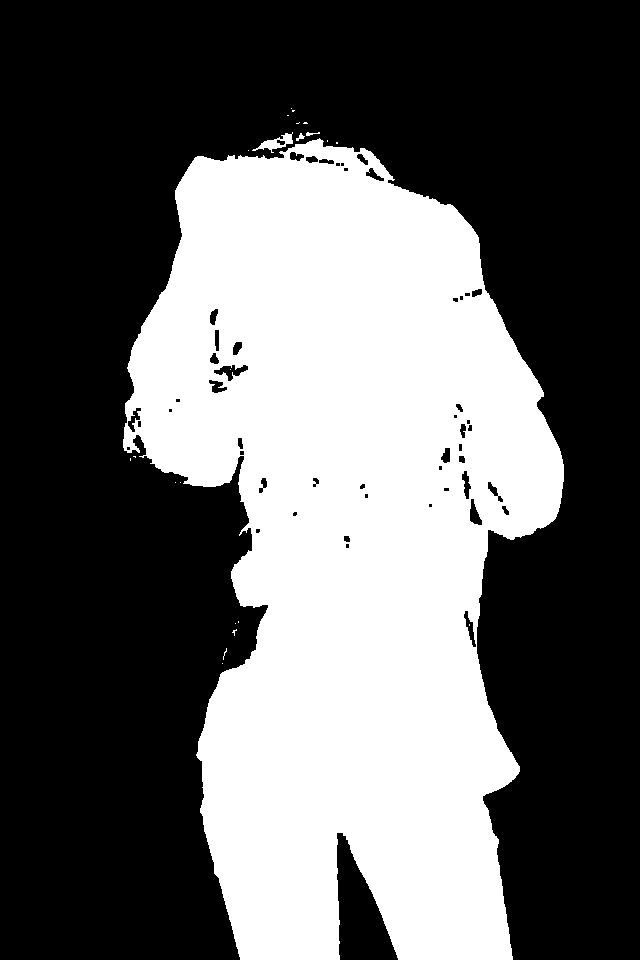

Iteration = 5
Erosion


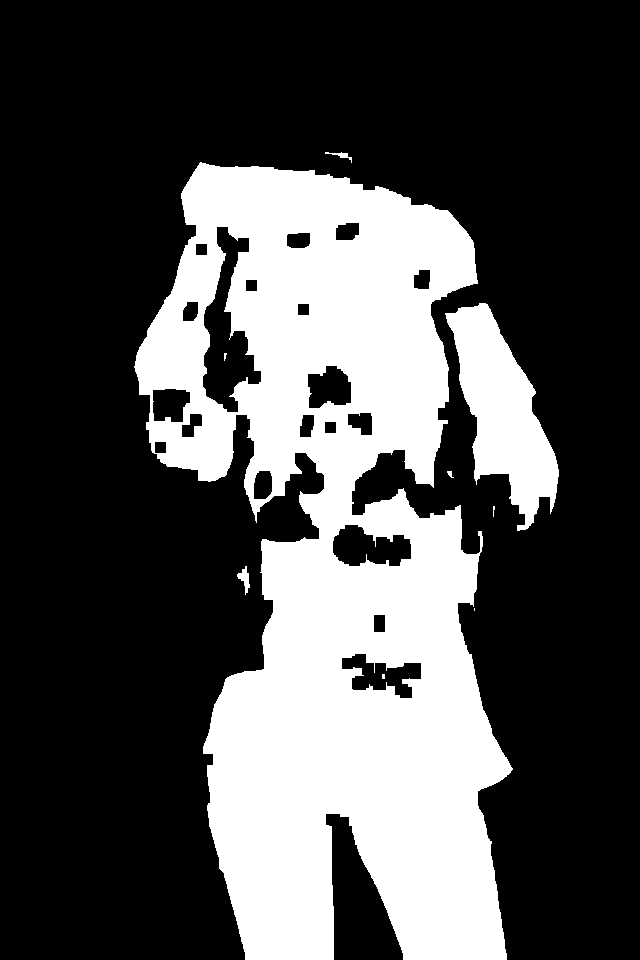

Dilation


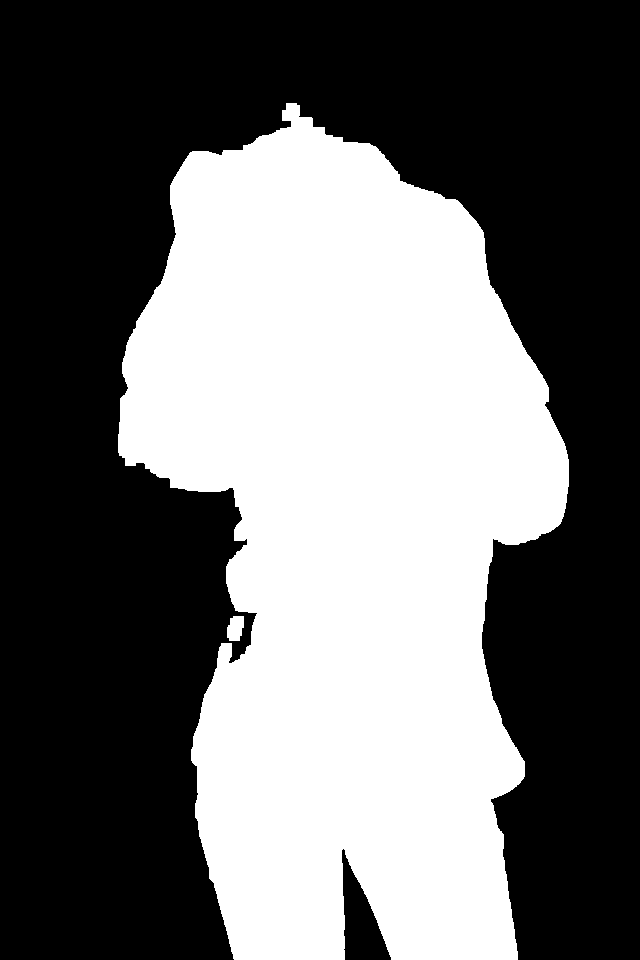

Opening


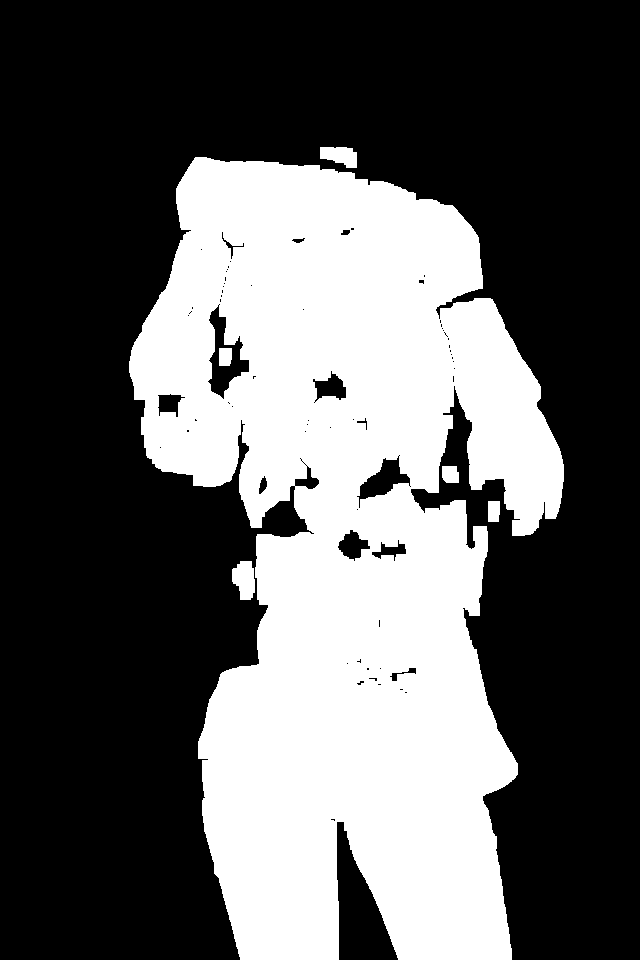

Closing


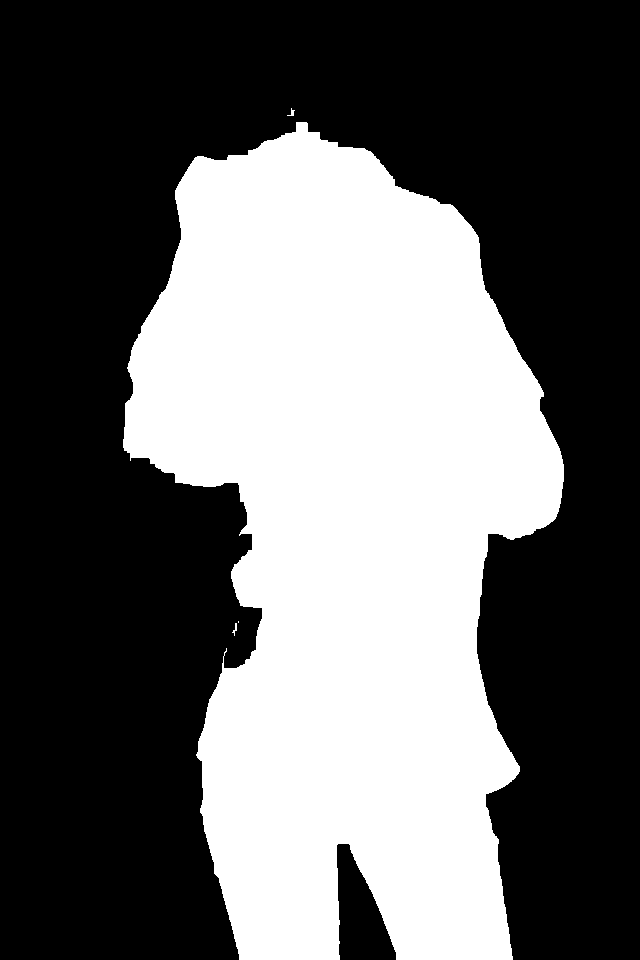

Iteration = 10
Erosion


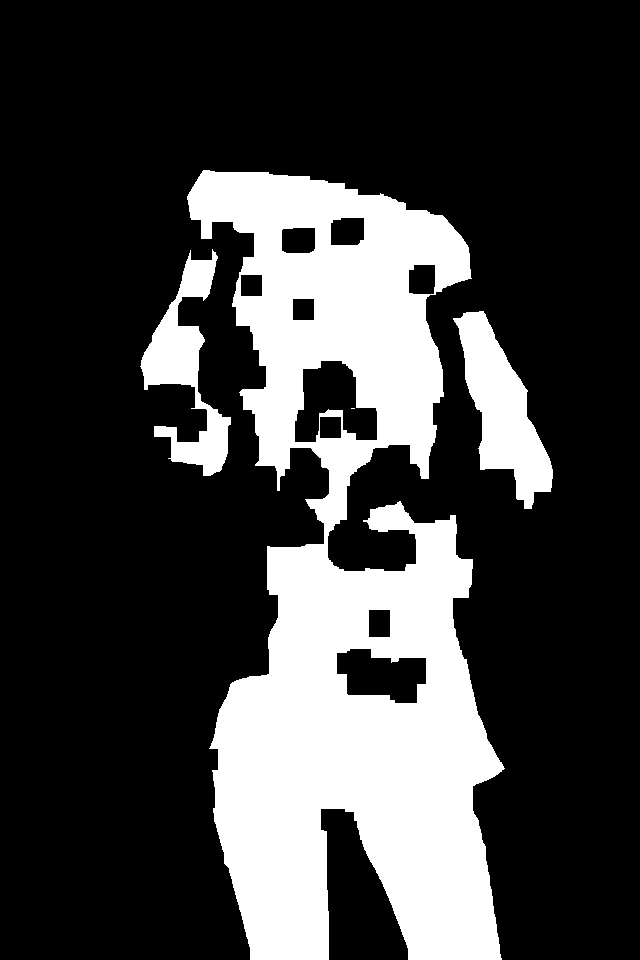

Dilation


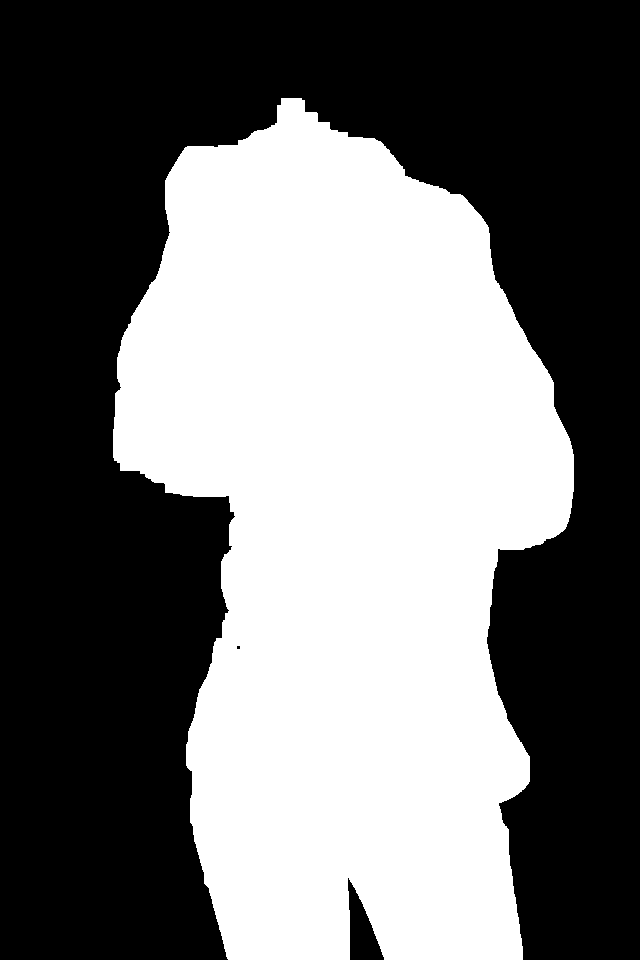

Opening


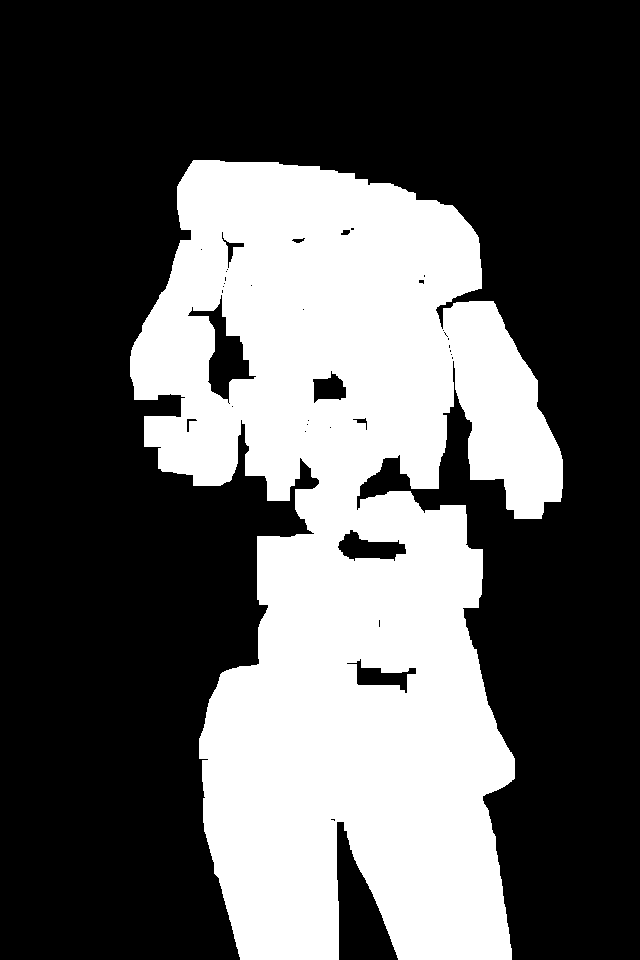

Closing


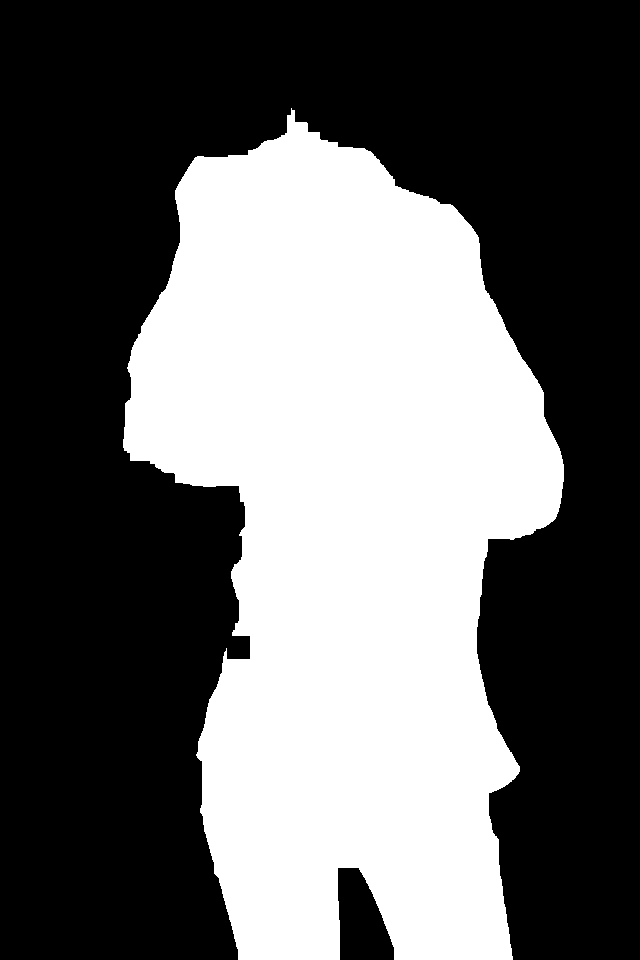

In [23]:
input_img = cv2.imread("Girl_in_front_of_a_green_background.jpg")    
# cv2.imshow("input", input_img)    
hsv_image = cv2.cvtColor(input_img, cv2.COLOR_RGB2HSV)

hue_image = hsv_image[:,:,0]    
hist = cv2.calcHist([hue_image],[0],None,[256],[0,256])

green_peak = np.argmax(hist[40:70])+40
green_peak_width = 20
T = 255*np.ones(256,dtype=np.uint8)        
T[green_peak-green_peak_width:green_peak+green_peak_width]=0
 
binary = T[hue_image]
# cv2.imshow("binary", binary)

connected_components(binary)    
    
A,P = area_and_perimeter(binary)
print("Form factor = ",P**2/(4*np.pi*A))  

print('Iteration = 1')
morphology(binary, 1)

print('Iteration = 5')
morphology(binary, 5)

print('Iteration = 10')
morphology(binary, 10)





# cv2.waitKey(0)
# cv2.destroyAllWindows()